In [2]:
import os
import tensorflow as tf

from tensorflow.keras.models import Model
from pprint import pprint

from models.rangeview_branch import create_range_view_branch
from models.blocks import create_res_conv_block, create_input_layer, factorized_bilinear_pooling, factorized_bilinear_pooling_new

In [3]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [4]:
model = create_range_view_branch()
inputs = model.inputs
outputs = model.outputs
pprint(inputs)
pprint(outputs)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended

In [ ]:
# n = factorized_bilinear_pooling(outputs[1], outputs[1], 64, 128)
# n

In [ ]:
# m = factorized_bilinear_pooling_new(outputs[1], outputs[1], 64, 128)
# m

In [6]:
# model.summary()

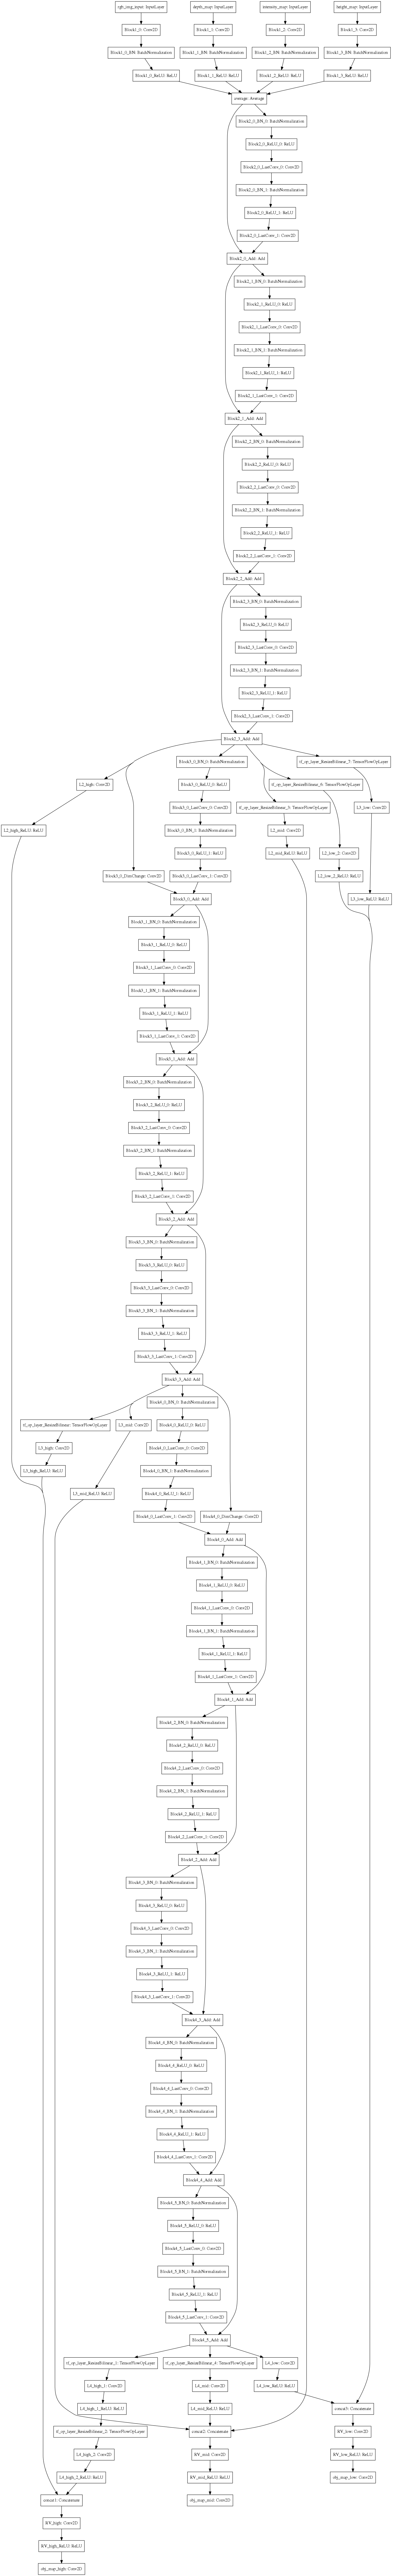

In [7]:
tf.keras.utils.plot_model(
    model, dpi=90, to_file='rv_model.png'
)